# Titanic Dataset

## Overview
The Titanic dataset is one of the most famous datasets for practicing binary classification and data exploration. It provides information about the passengers of the RMS Titanic, which sank on its maiden voyage in 1912.

## Dataset Information
The dataset includes the following key features:

| Column Name       | Description                                                                                 |
|-------------------|---------------------------------------------------------------------------------------------|
| **PassengerId**   | Unique identifier for each passenger.                                                      |
| **Survived**      | Binary indicator of survival: `1` = survived, `0` = did not survive (target variable).      |
| **Pclass**        | Passenger's class: `1` = 1st, `2` = 2nd, `3` = 3rd class.                                  |
| **Name**          | Full name of the passenger.                                                                |
| **Sex**           | Gender of the passenger (`male` or `female`).                                              |
| **Age**           | Age of the passenger (in years).                                                           |
| **SibSp**         | Number of siblings/spouses aboard the Titanic with the passenger.                          |
| **Parch**         | Number of parents/children aboard the Titanic with the passenger.                          |
| **Ticket**        | Ticket number.                                                                             |
| **Fare**          | Ticket price (in British pounds).                                                          |
| **Cabin**         | Cabin number (if known).                                                                   |
| **Embarked**      | Port of embarkation: `C` = Cherbourg, `Q` = Queenstown, `S` = Southampton.                 |

## Key Insights for Analysis
1. **Survival Rate Analysis**:
   - What factors influenced survival? E.g., gender, age, class.
   - Women and children are hypothesized to have higher survival rates ("Women and children first").

2. **Socioeconomic Status**:
   - Does passenger class (`Pclass`) correlate with survival?
   - Higher-class passengers often had better access to lifeboats.

3. **Family Connections**:
   - Does traveling with family (siblings, spouses, parents, children) improve survival odds?

4. **Embarkation and Fare**:
   - Were survival rates affected by the port of embarkation or the ticket fare?

## Challenges
- Missing data in `Age` and `Cabin` columns.
- Need to preprocess data (e.g., encode categorical variables like `Sex` and `Embarked`).

## Useful Links
- Kaggle Titanic Dataset: [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)



In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv") # Import training csv
test_df = pd.read_csv("test.csv")   # Import test csv
gender_df = pd.read_csv("gender_submission.csv")  # import gender csv

In [7]:
training_null_values = train_df.isnull().sum()  # Check for null values in train dataframe
train_df  # Display dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
print("Null Values: ", train_df.isnull().sum())

Null Values:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



## Number of Null values

*   There are **687** null values in Cabin number values
*   There are **177** null values in Age values
*   There are **2** null values in Embarkation location




## Possibly useful variables:

*   PClass - Passenger's class: **1 = 1st** , **2 = 2nd** , **3 = 3rd** class.
*   Survived - Binary indicator of survival: **1 = survived** , **0 = did not survive** (target variable).
*   Sex - Gender of the passenger (**male** or **female**).
*   Age - Age of the passenger (**in years**).
*   Number of **siblings/spouses** aboard the Titanic with the passenger.
* Parch -	Number of **parents/children** aboard the Titanic with the passenger.
* Cabin Number - **Cabin number** (if known).
* Embarked - Port of embarkation: **C = Cherbourg**, **Q = Queenstown**, **S = Southampton**.

Although these are the variables I am suggesting, this does not neccessarily mean that the other ones are not useful. Exploratory data analysis is required for the all the features do discover correlations between different data types

## Dealing with missing values

There are **891** rows in the training dataset. At approximately 90% of them are missing cabin values. Due to this I recommend we remove drop this column as too many values are missing and the only possible alternative is to delete the rows with missing values but that is highly impractical when more than half of them are missing and the dataset isn't that high to begin with.

In [24]:
"""

In this code block we create a new dataframe: new_train_df

This dataframe does not have Cabin column that the "train_df" has

"""

columns = train_df.columns.tolist() # Get list of columns from dataframe object

cabin_index = columns.index("Cabin") # Get the index position of cabin

# basically create a list of columns we want in our dataframe and exclude the cabin column
columns_to_include = [i for i in range(len(columns)) if i != cabin_index]

new_train_df = train_df.iloc[:, columns_to_include]
new_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Dealing with missing values continued

Ok now that we have dealt with the missing null values for cabin we need to fill in the missing null values for age.

There are 2 options:

* Average - Average incorporates all data points and represents the central tendency of the dataset but it is easily swayed by outliers.
* Median - Median is not affected by outliers/extreeme values. It is ideal for datasets with a skewed distribution and is very robust against outliers.

Let's take a look at the data first before we decide

In [53]:
train_df[train_df['Age'].notna()][['Age', 'Survived']]

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
885,39.0,0
886,27.0,0
887,19.0,1
889,26.0,1


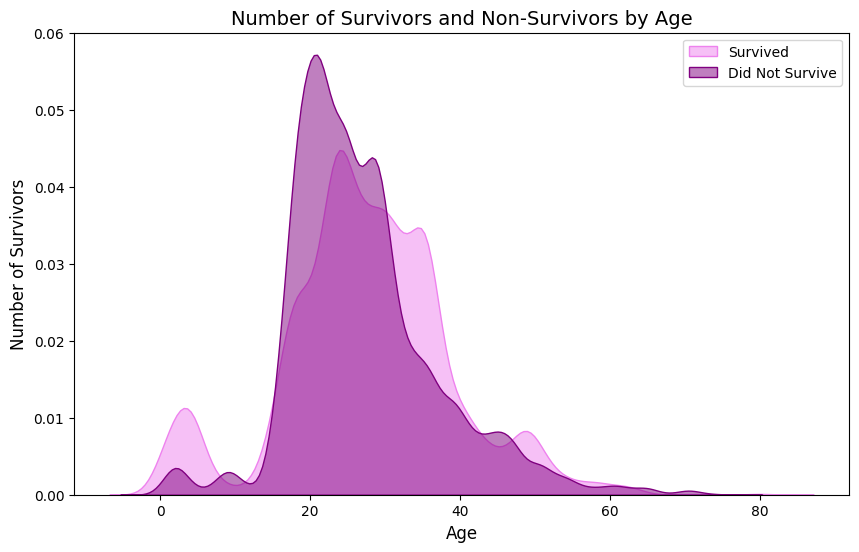

In [74]:
"""
.value_counts() is a function that finds the total number of occurances for each
recorded value. We want to count the number of people that survived at specific
ages and plot that on a bell curve to see the distribution of survivors
and deaths according to age.

"""


# Group the data to count occurrences of each age for Survived and Not Survived
survived_counts = train_df[train_df['Survived'] == 1]['Age'].value_counts()
not_survived_counts = train_df[train_df['Survived'] == 0]['Age'].value_counts()

# Expand counts to match the original data
survived_weights = train_df[train_df['Survived'] == 1]['Age'].map(survived_counts).values
not_survived_weights = train_df[train_df['Survived'] == 0]['Age'].map(not_survived_counts).values

# KDE plots with weights
plt.figure(figsize=(10, 6))

# KDE for Survived
sns.kdeplot(
    x=train_df[train_df['Survived'] == 1]['Age'],
    weights=survived_weights,
    bw_adjust=0.5,
    fill=True,
    alpha=0.5,
    label='Survived',
    color='violet'
)

# KDE for Not Survived
sns.kdeplot(
    x=train_df[train_df['Survived'] == 0]['Age'],
    weights=not_survived_weights,
    bw_adjust=0.5,
    fill=True,
    alpha=0.5,
    label='Did Not Survive',
    color='purple'
)

# Customize plot
plt.title("Number of Survivors and Non-Survivors by Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Survivors", fontsize=12)
plt.legend()
plt.grid(visible=False)
plt.show()

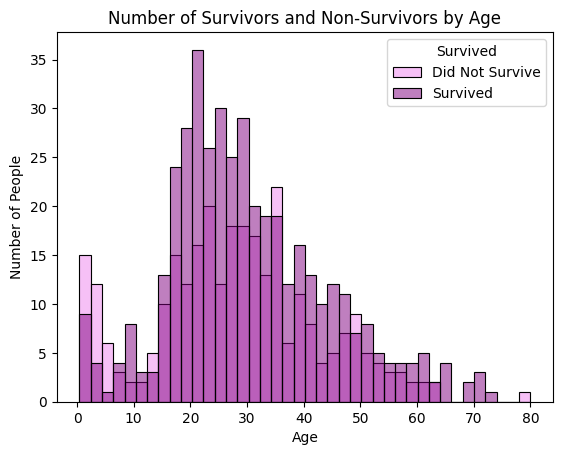

In [79]:
# Example: Histogram with frequency
sns.histplot(
    data=train_df,
    x='Age',
    hue='Survived',
    multiple='layer',
    binwidth=2,  # Smaller bin width for smoother bell-like curve
    stat='count',  # Shows counts instead of density
    alpha=0.5,
    palette=['purple', 'violet']
)

plt.title("Number of Survivors and Non-Survivors by Age")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.legend(title="Survived", labels=["Did Not Survive", "Survived"])
plt.show()

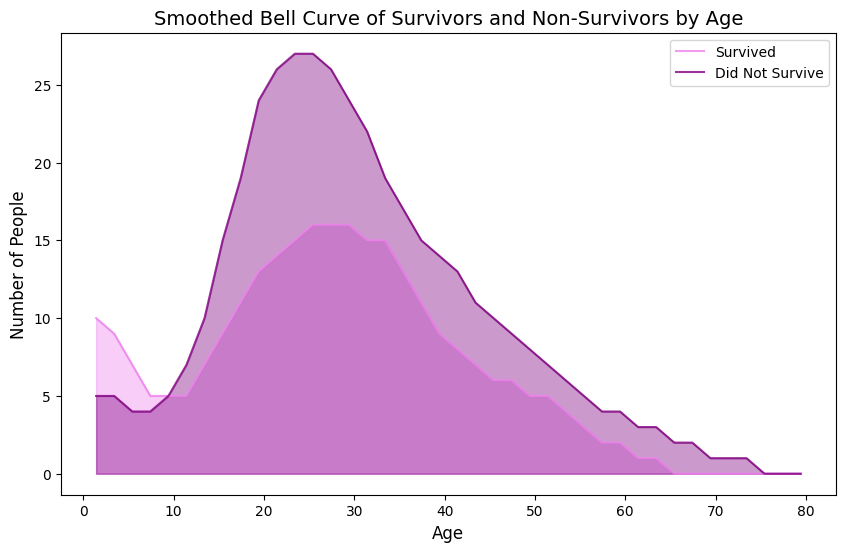

In [94]:
from scipy.ndimage import gaussian_filter1d

# Filter survivors and non-survivors
ages_survived = train_df[train_df['Survived'] == 1]['Age']
ages_non_survived = train_df[train_df['Survived'] == 0]['Age']

# Create histogram bins
bins = np.arange(train_df['Age'].min(), train_df['Age'].max() + 2, 2)  # Bin width of 2

# Compute histogram frequencies
freq_survived, bin_edges = np.histogram(ages_survived, bins=bins)
freq_non_survived, _ = np.histogram(ages_non_survived, bins=bins)

# Smooth the frequencies using a Gaussian filter
smoothed_survived = gaussian_filter1d(freq_survived, sigma=2)
smoothed_non_survived = gaussian_filter1d(freq_non_survived, sigma=2)

# Midpoints of bins for plotting
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot the smoothed bell curves
plt.figure(figsize=(10, 6))

plt.plot(bin_midpoints, smoothed_survived, label='Survived', color='violet', alpha=0.8)
plt.fill_between(bin_midpoints, smoothed_survived, alpha=0.4, color='violet')

plt.plot(bin_midpoints, smoothed_non_survived, label='Did Not Survive', color='purple', alpha=0.8)
plt.fill_between(bin_midpoints, smoothed_non_survived, alpha=0.4, color='purple')

# Customize the plot
plt.title("Smoothed Bell Curve of Survivors and Non-Survivors by Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of People", fontsize=12)
plt.legend()
plt.grid(visible=False)
plt.show()